In [1]:
import pandas as pd
import hashlib
import numpy as np

In [2]:
fileName = 'creditcard.csv'
df = pd.read_csv(fileName)

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Анализ признаков

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


>*Максимумы и минимумы показывают, что признаки V1-V28 находятся в одной размерности*

Учитывая максимальной значение 172792 появилось предположение, что в Time указаны секунды за двое суток

In [6]:
172792 / 24 / 3600

1.9999074074074075

>*Гипотеза подтвердилась*

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

>*Пустые строки отсутствуют. Это хорошо*

In [8]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

>*В столбцах V1-V28 содержится одинаковое количество уникальных данных. Появилось предположение, что V1-V28 это один большой признак*

### Проверяю гипотезу, что V1-V28 это один большой признак

Объединяю V1-V28 как строковые значения и применяю hash. Hash мог бы не использовать, но так удобнее анализировать

In [9]:
def hash_selected_columns(row):
    cols_to_hash = [str(row['V'+str(i)]) for i in range(1, 29)]
    row_str = ' '.join(cols_to_hash)
    return hashlib.sha256(row_str.encode()).hexdigest()

df['hash_values'] = df.apply(lambda row: hash_selected_columns(row), axis=1)

df['hash_values']

0         11c0255c885a6c90612a279cebc01e6e6fa961885de968...
1         1e70280ebd2f0f46b561684916bca40e80aa9567c06abb...
2         6e836966db5523af46656e5b652f61e8986846ec856b97...
3         6506b7952e3ea445d993a8e27b5c1a3a4753202cd644dc...
4         e2275542069e4b594cf29edb3f6e2d63d3802f0e5b86c3...
                                ...                        
284802    03228a4f5fcaa951c7adfd0ba875a1ef8d71613d870964...
284803    275aea136836c6237a20b1a7d626bf9d302e7d164b020c...
284804    953f258e99ae59f1baeed1c7af370b01d0953a3d595275...
284805    c81f697de64a2ed212c281a0eb23e8cf9ddd4b6361d7fb...
284806    ca8204dc197088a20c66b176f25b03ae7154ad735a49f2...
Name: hash_values, Length: 284807, dtype: object

In [10]:
df['hash_values'].nunique()

275663

>*Действительно, количество уникальных данных по каждому признаку V1-V24 в отдельности совпадает с количеством уникальных данных при объединении признаков в один*

In [11]:
df[df.duplicated('hash_values', keep=False)].head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hash_values
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0,8e3e2a93103de152ca7beefb5c7780c00fbe66623da26f...
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0,8e3e2a93103de152ca7beefb5c7780c00fbe66623da26f...
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0,1de812d638ed79bf587712ffd68d65c6eb10ff4365567b...
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0,1de812d638ed79bf587712ffd68d65c6eb10ff4365567b...
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0,69803a038037e0e0ff525ed8dea6c945dce28120afb7ce...
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0,69803a038037e0e0ff525ed8dea6c945dce28120afb7ce...
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0,69803a038037e0e0ff525ed8dea6c945dce28120afb7ce...
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0,69803a038037e0e0ff525ed8dea6c945dce28120afb7ce...
220,145.0,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,...,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0,370df9f7e9e6ef84e18e1420b2184ac54a3b93aa2ee34e...
221,145.0,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,...,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0,370df9f7e9e6ef84e18e1420b2184ac54a3b93aa2ee34e...


In [12]:
df[df.duplicated('hash_values', keep=False)]['hash_values'].nunique()

5149

При этом появилось препдоложении, что есть дублирующие строки со всеми признаками

### Проверяю гипотезу, что есть дублирующие строки

Хэшириую все признаки в новый столбец. Хотя при анализе полного датасета можно было не заморачиваться

In [13]:
def hash_df_row(row):
    row_str = ' '.join([str(val) for val in row])
    return hashlib.sha256(row_str.encode()).hexdigest()

df['hash_all_values'] = df.apply(hash_df_row, axis=1)

df['hash_all_values']

0         cfbd6e4473f53f7af7855bae3906e5ec304e6e0222d9c2...
1         9cd6b7a4aafb7a2891e2aa336ec5bcf287abb23b039c54...
2         0071d8ada551865b842a75ac1d7a2296562a1e45f6610f...
3         508c7b125dfd7516c531ed1d6a368e4bb59898549b118d...
4         1ca239b25c77f13d99cb74d6debe2255df112b09ca0b55...
                                ...                        
284802    71237dbe5c0c8cc8eb555ea6f0f53bd50136cca663bf0a...
284803    8bdcb53c6844c56dc1c7bbe8575e1a1e723fbb42fea792...
284804    bbb0f95a6ac73bc279a3fbf5bfeb3f3d5d765e5cada9fb...
284805    170f850b478c7b4017c0db9f56050f2f5e3ee91261745a...
284806    91bd5967f644d9d05ba1a2a14ba1623eef17ca306cd19b...
Name: hash_all_values, Length: 284807, dtype: object

In [14]:
df['hash_all_values'].nunique()

283726

In [15]:
df[df.duplicated('hash_all_values', keep=False)].head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,hash_values,hash_all_values
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0,8e3e2a93103de152ca7beefb5c7780c00fbe66623da26f...,ff745042ab2dce8b16a16c329698a92ed95277360b66f3...
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0,8e3e2a93103de152ca7beefb5c7780c00fbe66623da26f...,ff745042ab2dce8b16a16c329698a92ed95277360b66f3...
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0,1de812d638ed79bf587712ffd68d65c6eb10ff4365567b...,3d2223be4937411a4b9da9a85b6218c61f3e2bd87b2ed5...
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0,1de812d638ed79bf587712ffd68d65c6eb10ff4365567b...,3d2223be4937411a4b9da9a85b6218c61f3e2bd87b2ed5...
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0,69803a038037e0e0ff525ed8dea6c945dce28120afb7ce...,5b88c99a5be7e8701cbae68b758408c38d03789605bf97...
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0,69803a038037e0e0ff525ed8dea6c945dce28120afb7ce...,5b88c99a5be7e8701cbae68b758408c38d03789605bf97...
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0,69803a038037e0e0ff525ed8dea6c945dce28120afb7ce...,5b88c99a5be7e8701cbae68b758408c38d03789605bf97...
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0,69803a038037e0e0ff525ed8dea6c945dce28120afb7ce...,5b88c99a5be7e8701cbae68b758408c38d03789605bf97...
220,145.0,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,...,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0,370df9f7e9e6ef84e18e1420b2184ac54a3b93aa2ee34e...,aea4aa60a19d522715ddf267c8d7f0504fccef3d158f82...
221,145.0,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,...,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0,370df9f7e9e6ef84e18e1420b2184ac54a3b93aa2ee34e...,aea4aa60a19d522715ddf267c8d7f0504fccef3d158f82...


>*Действительно, есть дубликаты*

Перед удалением дубликаты проверяю, сходятся ли цифры

In [16]:
df[df.duplicated('hash_all_values', keep=False)]['hash_all_values'].nunique()

773

In [17]:
df[df.duplicated('hash_all_values', keep=False)]['hash_all_values'].shape[0]

1854

In [18]:
1854 - 773

1081

In [19]:
df.shape[0]

284807

In [20]:
df.drop_duplicates(subset=['hash_all_values']).shape[0]

283726

In [21]:
284807 - 283726

1081

>*Цифры сошлись, получилось 1081 лишняя запись. Могу дропнуть дубликаты*

In [22]:
df = df.drop_duplicates(subset=['hash_all_values'])

In [24]:
df.shape[0]

283726

Анализирую дальше оставшиеся схожие данные в V1-V28

In [366]:
df[df.duplicated('hash_values', keep=False)].head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,hash_values,hash_all_values
226,150.0,-0.399880,1.051966,1.390802,0.093132,-0.007699,-0.717559,0.588095,0.085932,-0.310722,...,0.057041,0.329354,-0.302724,0.083883,0.258834,0.096337,0.89,0,3a12d1e6b6a736d0cb42fe4e4c5851fba3f88afb604c5d...,c67c743d1deaba1229b85c3b1d25e55e94dfa441fda048...
231,154.0,1.315601,0.413148,-0.018953,0.487834,0.132331,-0.574307,0.146563,-0.215923,-0.080276,...,0.011352,-0.477579,0.365667,0.143254,-0.016757,0.024640,1.98,0,6e7e32b4530814e8c2967723f9b2eb277d554138a67f39...,ceb2a403f14636032a0b6b479739bc653f971c5206115d...
286,205.0,1.182399,0.059489,0.310673,0.828817,0.341209,1.112593,-0.292778,0.287394,0.268307,...,-0.056486,-1.356986,0.475790,-0.546519,0.063035,0.008047,12.99,0,2e2ee7db8b4f33c691143e4b4f1ca11470156e05b0d953...,0962445b10bb5d713def4ceba3a17d75e2d06562beeaeb...
335,246.0,1.311258,0.075028,-1.292832,-0.483154,2.139257,3.181564,-0.505045,0.804860,-0.074071,...,0.095279,0.946121,0.369713,0.110626,-0.021837,0.023638,1.98,0,c64a928898254c375ecf4c277d86e27751ad77c0becde1...,5f853156a5fc8e7ab0e85a627f1a35848443f5c8cc4e50...
356,261.0,1.260328,0.299161,0.527681,0.614899,-0.420592,-0.977533,0.108485,-0.244502,-0.058316,...,0.128290,0.398967,0.240282,0.092213,-0.024633,0.020529,1.98,0,bf549de33409044516a1ec3e13ce8419a22d3ce38ca975...,612cfc84047c092efaaa58ed83e471413a9f5b323c2824...
430,311.0,1.090349,-0.270146,1.235911,0.702071,-0.856229,0.485169,-0.804134,0.359130,0.673894,...,0.046070,0.052707,0.149042,0.329248,0.028873,0.013954,11.50,0,fe14f88a73ac4dbac39ea7609757f1b46f9f439c9d9025...,51860fa3c207223fb42a660032633033e74c3f17b256f6...
443,322.0,1.187090,0.008980,1.094491,1.221034,-0.676504,0.095473,-0.517634,0.078169,0.811484,...,-0.076044,-0.096204,0.506423,-0.380323,0.076734,0.034890,9.99,0,21884efa62abd0a05c2588be9030a74c1d93f0c01ffbe4...,2c5542e9344b2f1a6ba79ffbf5769fb7c13c16bff51161...
490,359.0,1.261597,0.256346,0.513254,0.619054,-0.472482,-0.989342,0.065431,-0.208781,0.035924,...,0.135646,0.376418,0.220320,0.094706,-0.028559,0.019023,1.29,0,d4cf438b0431961f1528f7c52834c9db5e8996862a8fdc...,68d2d16cd8715da347be7cd8034a72a73d1146dbd0e144...
498,367.0,1.256217,0.255028,0.277716,0.706677,-0.495831,-1.106735,-0.008493,-0.124504,0.243687,...,0.146551,0.307164,0.169070,0.099129,-0.032095,0.027743,1.29,0,9f8b5f1c7c88fbb3ad3dcd49572e872b07347195c8feb2...,5c50e8f7959721cd94240d5c9049d17ff779ee27e5cfbe...
503,369.0,1.255729,0.297650,0.287526,0.699902,-0.438405,-1.088542,0.034421,-0.159596,0.149990,...,0.137806,0.318641,0.190562,0.097319,-0.028174,0.029141,1.98,0,c08b298e2ac1a57caedb4b414bd9a2d5df4fe3a8b35402...,e8abff61b431ed6a58fea91f3f4b13068fc4274cf6fb0d...


In [367]:
epsilon = 1e-6 
mask = np.isclose(df['V1'], -0.399880, atol=epsilon)
df[mask]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,hash_values,hash_all_values
226,150.0,-0.39988,1.051966,1.390802,0.093132,-0.007699,-0.717559,0.588095,0.085932,-0.310722,...,0.057041,0.329354,-0.302724,0.083883,0.258834,0.096337,0.89,0,3a12d1e6b6a736d0cb42fe4e4c5851fba3f88afb604c5d...,c67c743d1deaba1229b85c3b1d25e55e94dfa441fda048...
66193,51929.0,-0.39988,1.051966,1.390802,0.093132,-0.007699,-0.717559,0.588095,0.085932,-0.310722,...,0.057041,0.329354,-0.302724,0.083883,0.258834,0.096337,0.89,0,3a12d1e6b6a736d0cb42fe4e4c5851fba3f88afb604c5d...,9c2fb41ecc2c58f39c55ffb563865f1b3bdc00533b2c27...


In [368]:
epsilon = 1e-10
mask = np.isclose(df['V1'], 1.260328, atol=epsilon)
df[mask]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,hash_values,hash_all_values
356,261.0,1.260328,0.299161,0.527681,0.614899,-0.420592,-0.977533,0.108485,-0.244502,-0.058316,...,0.128290,0.398967,0.240282,0.092213,-0.024633,0.020529,1.98,0,bf549de33409044516a1ec3e13ce8419a22d3ce38ca975...,612cfc84047c092efaaa58ed83e471413a9f5b323c2824...
8148,11036.0,1.260337,0.358795,0.415191,0.909954,-0.430469,-1.059932,-0.111202,-0.196802,1.549829,...,0.159632,0.236808,0.142200,0.061376,-0.059656,0.020910,0.89,0,929eee76c80d2564d14f10e4cb32e0ced8d405c0b3f692...,1cc9a5be5ebad76b238d2e81a14f59b1da227055ef8413...
22819,32446.0,1.260340,-0.321471,0.201896,-1.372129,-0.843337,-1.235583,-0.154809,-0.125367,1.371588,...,0.035406,0.428240,0.377469,-0.034618,0.010263,0.011444,4.74,0,3144c9457afe1c6ea27dcc3e8a3ee3a5a80b2cd1ae8bab...,9ac1d650721d6647491171c72db9a25f8d7c9692934cc5...
24335,33182.0,1.260328,0.299161,0.527681,0.614899,-0.420592,-0.977533,0.108485,-0.244502,-0.058316,...,0.128290,0.398967,0.240282,0.092213,-0.024633,0.020529,1.98,0,bf549de33409044516a1ec3e13ce8419a22d3ce38ca975...,a78f6b49be7e996555cfe2da07a558a2e44fbf9b467453...
42764,41235.0,1.260324,-0.480037,0.431408,-1.266509,-1.114446,-1.171178,-0.326584,-0.151157,1.760315,...,-0.085131,0.433060,0.518746,0.001398,0.017952,0.019082,22.27,0,cc9198bc6fd2552de25ee617f3e8ae1266b7b511989b28...,e7ffb2be1ad4fabdc5eb4786b94d7c63e9dc64c347785c...
90898,63225.0,1.260328,0.224802,0.504098,0.623477,-0.509867,-0.998997,0.038049,-0.185426,0.098458,...,0.140167,0.365126,0.206149,0.096038,-0.031356,0.018222,1.79,0,2b0bf9060c78ccb5974502dfdd7a6c6b46c57ffb451e60...,27882a444ad44548e0fc56747626a67985f12ea05415f9...
129667,79178.0,1.260339,-0.687452,0.484010,-0.609112,-1.293499,-0.850213,-0.571450,-0.047256,-0.965288,...,0.135403,0.528742,-0.009811,0.873289,-0.072439,0.007556,45.66,0,3cbf887ea130115bcedeb2ca35c7d7d905641666be6c5d...,24b878fa33bc84b14a1650d21ce7907957393413d9bf61...
136733,81841.0,1.260329,-0.730932,0.013454,-0.771135,-0.730749,-0.178361,-0.521915,0.068116,-1.015085,...,-0.002431,-0.306412,0.163374,1.072437,-0.068450,-0.007323,50.00,0,871bfcbb1c931bb7f33634e4ccac9167f6e2fd2594124b...,71f6de74454449612621ebc411335ffc76f97296d07871...


In [369]:
mask = (df['V1'].apply(lambda x: str(x))) == '1.26032783148891'
df[mask]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,hash_values,hash_all_values
356,261.0,1.260328,0.299161,0.527681,0.614899,-0.420592,-0.977533,0.108485,-0.244502,-0.058316,...,0.12829,0.398967,0.240282,0.092213,-0.024633,0.020529,1.98,0,bf549de33409044516a1ec3e13ce8419a22d3ce38ca975...,612cfc84047c092efaaa58ed83e471413a9f5b323c2824...
24335,33182.0,1.260328,0.299161,0.527681,0.614899,-0.420592,-0.977533,0.108485,-0.244502,-0.058316,...,0.12829,0.398967,0.240282,0.092213,-0.024633,0.020529,1.98,0,bf549de33409044516a1ec3e13ce8419a22d3ce38ca975...,a78f6b49be7e996555cfe2da07a558a2e44fbf9b467453...


In [370]:
df['V1'].apply(lambda x: str(x))[356]

'1.26032783148891'

Так как данных немного, также выгружаю в Excel, чтобы посмотреть "глазками"

In [371]:
df[df.duplicated('hash_values', keep=False)].to_excel('duplicates.xlsx')

>*В результате анализа, установлено, что есть записи, которые совпадают не только по V1-V28, но и по сумме.*

### Анализ дубликатов V1-V28 вместе с Amount

In [373]:
def hash_selected_columns(row):
    cols_to_hash = [str(row['V'+str(i)]) for i in range(1, 29)]
    cols_to_hash.append(str(row['Amount']))
    row_str = ' '.join(cols_to_hash)
    return hashlib.sha256(row_str.encode()).hexdigest()

df.loc[:, 'hash_with_amount'] = df.apply(lambda row: hash_selected_columns(row), axis=1)

df['hash_with_amount']

C:\Users\Rustem\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


0         7dd75ebd3c8d7d7d7157c20b01113ecee1f0eb3da2949f...
1         56ec48c4d87d4091740bee6663df9d310388ba77218503...
2         212e0ac2bbe52c89b8ae50fcacbc6477642d501b6dcabe...
3         4eb3a29c70fd35233ce58458176cd529696ce10f2032b7...
4         0b41a935aa5d1a1b61351b98ea9c36e0ba2325a12b6ef6...
                                ...                        
284802    29509bdb77ef4be6d3635fa4b0331463d1c8722110b800...
284803    8fb21390ec7ecaa647c31ba1e2b675cedb90eb8f80c59a...
284804    895fee0e96a297957e0b8c2052c9ee5e63d4a58d0c0da7...
284805    08cb83c1731a57f3e27d1103dcf9cafb9144621e267a52...
284806    7aa1d99087b61adb5b9696861876641cfc41df8b1a9730...
Name: hash_with_amount, Length: 283726, dtype: object

In [374]:
df[df.duplicated('hash_values', keep=False)]['hash_values'].nunique()

4383

In [375]:
df[df.duplicated('hash_with_amount', keep=False)]['hash_with_amount'].nunique()

4383

In [376]:
df[df.duplicated('hash_values', keep=False)]['hash_values'].shape[0]

12446

In [377]:
df[df.duplicated('hash_values', keep=False)]['hash_values'].shape[0]

12446

In [378]:
df[df.duplicated('hash_with_amount', keep=False)]['hash_values'].value_counts()

a150c30ecb18a539d94ee11274c5dd58377c3a3fdba7dd09bdb022f1ae814ecf    77
9dbbb1962abfacec0446c8494e9eef808e9bef412b4d377a3f51e1cf617ab4bc    77
408a3f47abffdf4b268426e1119b3ca5ffd5156d42d26ae70e329f587779e3f0    62
9927a2ee9508d4c388dfcb0f2931e93e9580f1fb19446796994f46c285ddbe98    60
25d287121e8c2617f20e289da297dc10b67da97340835fc0ef7d0916e2d9e787    53
                                                                    ..
ab76864590ce4847dcb06a1b117daa3366d7c7c695db6386bc9fa79875684a83     2
886a772bf5472a6472992a32c93b25f1c4bec9059df338d72fba1e383a947c6f     2
118b87a825cfc5ca2f4c22dfe811c676da863431c92799071197fc1628db4c51     2
8dbaa70b5bbc4c72ef1737566df500a5a7cc79734ac398a6c9be940abc86f007     2
5c55a9671121d17c532d6976c17d6f3f8cb09f424ba5461867ce2c7508a97f79     2
Name: hash_values, Length: 4383, dtype: int64

In [379]:
without_duplicates = df.drop_duplicates(subset=['hash_with_amount'])

In [380]:
without_duplicates.shape[0]

275663

In [381]:
without_duplicates.nunique()

Time                123432
V1                  275663
V2                  275663
V3                  275663
V4                  275663
V5                  275663
V6                  275663
V7                  275663
V8                  275663
V9                  275663
V10                 275663
V11                 275663
V12                 275663
V13                 275663
V14                 275663
V15                 275663
V16                 275663
V17                 275663
V18                 275663
V19                 275663
V20                 275663
V21                 275663
V22                 275663
V23                 275663
V24                 275663
V25                 275663
V26                 275663
V27                 275663
V28                 275663
Amount               32767
Class                    2
hash_values         275663
hash_all_values     275663
hash_with_amount    275663
dtype: int64

>*__Выводы__<br>*
*Если не учитывать дубликаты V1-V28, то все строки являются уникальными. Из этого следует, что:*<br>
*1. V1-V28 не получится рассматривать как один признак, разбитый на 28 маленьких*<br>
*2. V1-V28 не получится рассматривать по отдельности как номинальные признаки, то есть признаки с конечным множеством. Если их рассматировать как конечные множества, то они не несут полезную информацию для задачи классификации.*<br>
*V1-V28 будут рассмотрены как числовые значения*

## Работаем с V1-V28

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

Проверяем корреляцию признаков

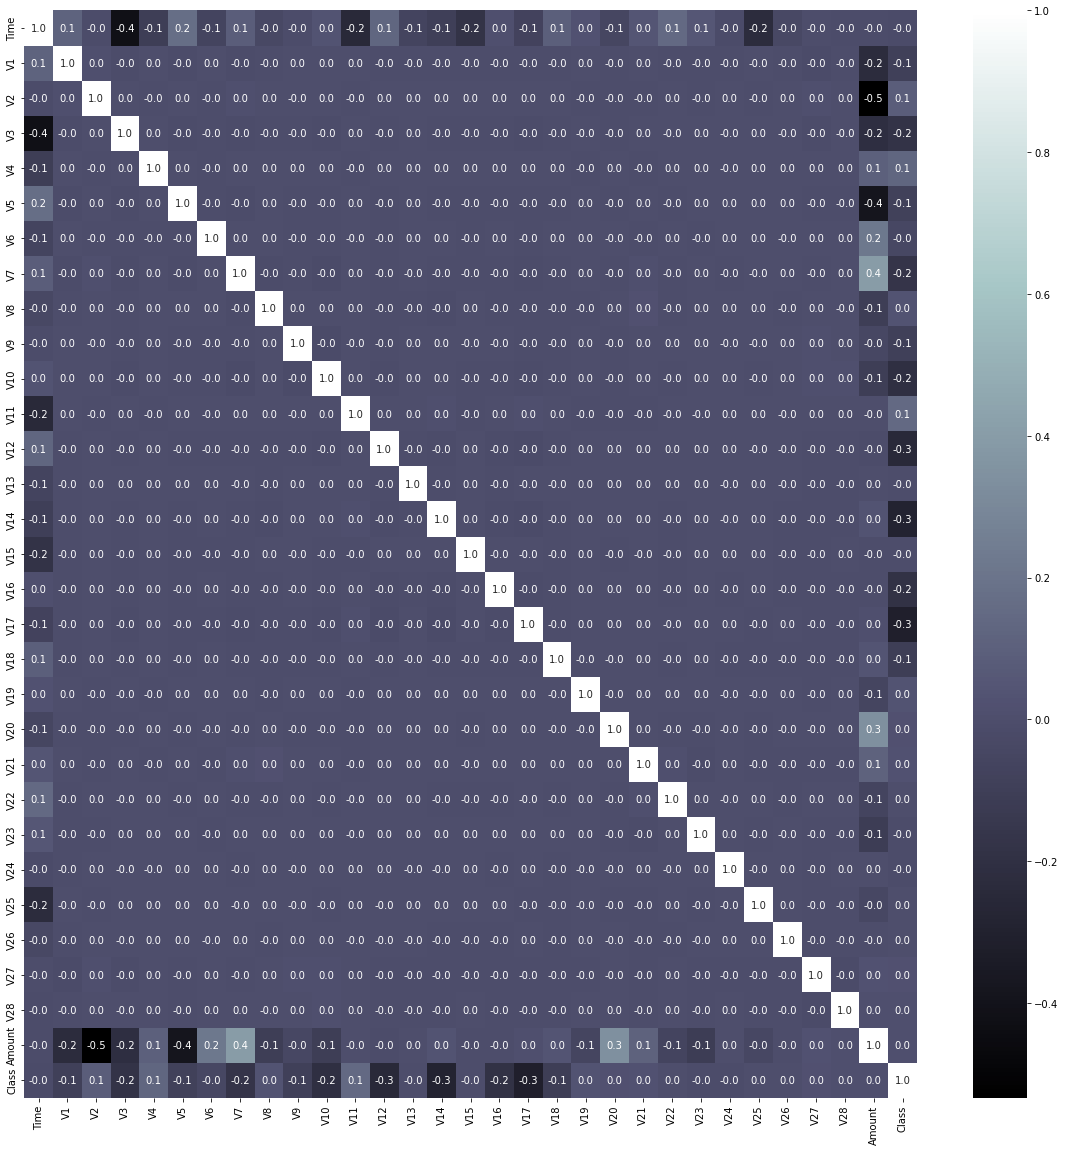

In [216]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(ax=ax, 
            data=df.corr(), 
            annot = True, 
            cmap='bone', 
            fmt=".1f"
           )
plt.show()

>*Сильной корреляции нет*

### Создаем новый признак "сумма всех признаков V1-V28"

In [25]:
df['sum_V1_V28'] = df.loc[:, 'V1':'V28'].sum(axis=1)

C:\Users\Rustem\AppData\Local\Temp\ipykernel_13428\2665348258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sum_V1_V28'] = df.loc[:, 'V1':'V28'].sum(axis=1)


## Применение алгоритмов снижения размерности

Использовал новые признаки, полученные снижением размерности. Боялся, что комп не потянет исходные 28 признаков (V1-V28)

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [27]:
pca_components = 15

In [28]:
# Стандартизация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.loc[:, 'V1':'V28'])

In [29]:
# Применение PCA
pca = PCA(n_components=pca_components)
pca.fit(scaled_data)
transformed_data = pca.transform(scaled_data)

In [30]:
pca_columns = [f'PC{i}' for i in range(1,pca_components+1)]
pca_df = pd.DataFrame(data=transformed_data, columns=pca_columns)

In [31]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-0.177633,-0.278739,0.712452,0.103591,-0.700758,-0.384099,0.974096,-0.331796,-0.283786,0.745602,-0.001581,0.829248,0.074844,-0.482974,-0.389481
1,-0.168008,0.265347,-0.778832,-0.106960,0.210896,-0.605757,-0.586836,0.165639,0.064129,-0.400091,1.871506,0.327625,-0.080557,0.273853,0.177064
2,-0.171542,-0.271970,0.506524,-1.221269,0.784461,1.470739,2.795685,0.441903,-1.701805,-0.047792,0.682026,1.526924,-0.634207,-0.130928,0.091852
3,0.168089,-0.417019,-0.746474,0.312412,0.677986,-0.063317,2.009384,-0.382198,-0.641945,0.672208,-0.339312,0.465044,1.323908,-2.102865,1.191290
4,0.284254,-0.052590,0.472944,0.247492,0.760715,-1.073435,0.601869,-0.850178,-0.952543,0.366729,-1.201191,0.175674,-0.925258,0.794316,-0.609270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,6.640596,-3.811617,3.478806,-0.232677,1.087314,-0.888219,-2.786888,3.134740,-3.650720,0.846554,1.353010,-0.039422,0.824804,0.949698,-0.573421
283722,-0.519749,0.066779,0.234520,-0.345406,-0.548603,-1.392032,0.960394,-0.324759,-0.947501,0.397712,-0.221883,-0.266662,-0.548211,0.726971,-0.766393
283723,-0.352150,-0.172248,0.233715,-1.045378,0.356637,-0.584400,-1.829427,1.743272,-0.407466,-0.192736,-0.891922,-0.483861,-0.433428,-0.510588,2.476409
283724,-0.036869,-0.333653,0.704838,-0.326411,-0.977899,-0.063510,0.076088,-0.075609,-0.515149,0.921821,-1.786724,0.440395,-0.736627,-1.538031,-1.334176


In [32]:
df = df.reset_index(drop=True)
df = pd.concat([df, pca_df], axis=1)

In [33]:
df.shape

(283726, 49)

In [34]:
len(transformed_data)

283726

## Новые признаки на основе Time

### Hour

In [23]:
df.loc[:,'Hour']  = (df['Time']  // 3600) % 24

C:\Users\Rustem\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Проверяю

In [138]:
mask = (df['Time'] >= 82798) & (df['Time'] <= 86400)
df[mask][['Time','Hour']]

,Time,Hour
138699,82798.0,22.0
138700,82798.0,22.0
138702,82798.0,22.0
138704,82800.0,23.0
138705,82801.0,23.0
...,...,...
144782,86394.0,23.0
144783,86395.0,23.0
144784,86398.0,23.0
144785,86398.0,23.0


In [457]:
mask = df['Class'] == 1
df[mask].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,Hour
count,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,...,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000
mean,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.965033,1.462351,-0.174840,0.067522,-0.128302,-0.502458,-0.239426,0.223904,0.525985,11.655391
std,48636.179973,6.593145,4.122500,6.909647,2.871523,5.278831,1.715347,6.858024,5.585950,2.465047,...,1.527970,1.860712,1.377712,1.298635,1.211920,2.339621,1.465509,1.231863,1.860356,6.544636
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-5.735108,-8.166097,-11.267174,-12.904479,-4.888516,-6.428847,-6.775918,-3.745436,-3.323093,0.000000
25%,41203.000000,-5.603690,1.145381,-7.926507,2.288644,-4.278983,-2.450444,-6.989195,-0.161518,-3.796760,...,-0.055087,0.427584,-0.821975,-0.540200,-0.979162,-1.846103,-1.108576,-0.710268,-0.455573,6.000000
50%,73408.000000,-2.271755,2.617105,-4.875397,4.100098,-1.372245,-1.420468,-2.902079,0.617738,-2.099049,...,0.885400,1.367329,-0.371800,0.105251,-0.208309,-0.410110,-0.318314,0.155131,0.247337,12.000000
75%,129095.000000,-0.361428,4.571743,-2.171454,6.290918,0.260821,-0.413647,-0.907188,1.709417,-0.788388,...,1.747128,2.662599,0.252479,0.700876,0.615756,1.051970,0.342987,1.072039,1.081929,17.000000
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,6.282539,5.707236,7.475222,3.763508,4.173747,11.267652,7.406475,3.684809,12.802448,23.000000


### Time_of_Day

В итоге этот признак оказался неважным.<br>
One-hot кодирование тоже на дало результата

In [36]:
def get_time_of_day(hour):
    if hour == 23 or 0 <= hour <= 3:
        return 1 #'night'
    elif 4 <= hour <= 10:
        return 2 #'morning'
    elif 11 <= hour <= 16:
        return 3 #'day'
    elif 17 <= hour <= 22:
        return 4 #'evening'

df.loc[:,['Time_of_Day']] = df['Hour'].apply(get_time_of_day)

In [43]:
df['Time_of_Day'].unique()

array([1, 2, 3, 4], dtype=int64)

In [460]:
mask = df['Hour'] == 17
df[mask]['Time_of_Day'].unique()

array([4], dtype=int64)

In [94]:
mask = df['Class'] == 1
df[mask]['Time_of_Day'].value_counts()

3    158
4    118
2     99
1     98
Name: Time_of_Day, dtype: int64

#### Применяю one-hot кодирование

In [158]:
from sklearn.preprocessing import OneHotEncoder

In [160]:
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df[['Time_of_Day']])

In [161]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names(['Time_of_Day']))

In [164]:
encoded_df.nunique()

Time_of_Day_1    2
Time_of_Day_2    2
Time_of_Day_3    2
Time_of_Day_4    2
dtype: int64

In [165]:
df = pd.concat([df, encoded_df], axis=1)

## Изучаем параметр Amount

In [230]:
df['Amount'].describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

In [41]:
import matplotlib.pyplot as plt

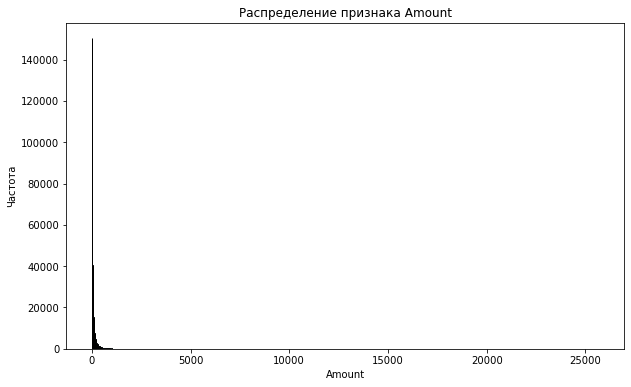

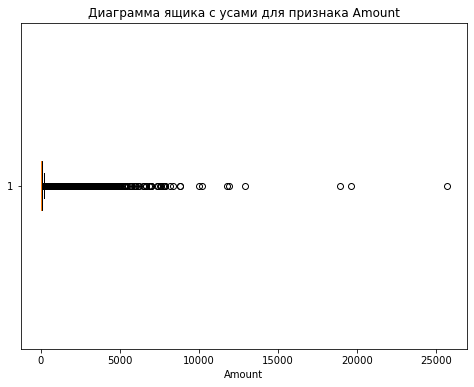

In [231]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(df['Amount'], bins=1000, color='skyblue', edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Частота')
plt.title('Распределение признака Amount')
plt.show()

# Построение ящика с усами
plt.figure(figsize=(8, 6))
plt.boxplot(df['Amount'], vert=False)
plt.xlabel('Amount')
plt.title('Диаграмма ящика с усами для признака Amount')
plt.show()

>*Распредление смещенное влево. Судя по-всему распредление лог-нормальное*

### Создание нового признака Amount_log

Создаю новый признак, применяя логарифм. При этом Amount тоже оставляю

In [24]:
df['Amount_log'] = np.log1p(df['Amount'])

C:\Users\Rustem\AppData\Local\Temp\ipykernel_15116\2760982901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount_log'] = np.log1p(df['Amount'])


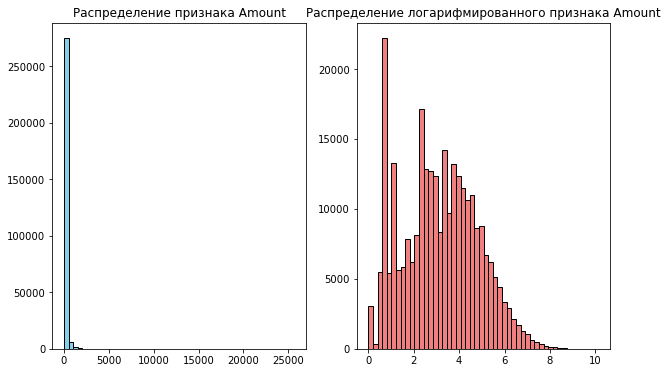

In [463]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Amount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение признака Amount')

plt.subplot(1, 2, 2)
plt.hist(df['Amount_log'], bins=50, color='lightcoral', edgecolor='black')
plt.title('Распределение логарифмированного признака Amount')
plt.show()

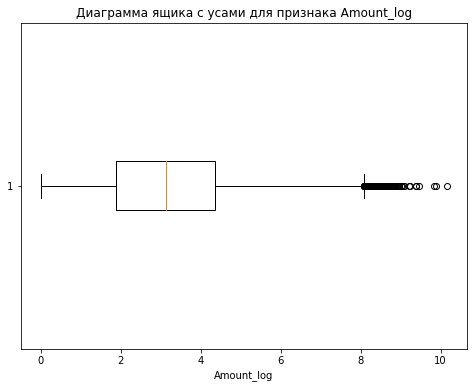

In [234]:
# Построение ящика с усами
plt.figure(figsize=(8, 6))
plt.boxplot(df['Amount_log'], vert=False)
plt.xlabel('Amount_log')
plt.title('Диаграмма ящика с усами для признака Amount_log')
plt.show()

## Формируем признаки X и y

In [25]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'hash_values', 'hash_all_values', 'Hour', 'Amount_log'],
      dtype='object')

Сначала не использовал V1-V28, потому что как номинальный признак они не имеют ценности. Но модели показали себя очень плохо при предсказании класса 1

In [102]:
# Без V1-V24. Только на признаках, сгенированных на основании Time, Amount
#X = df[['Hour','Time_of_Day','Amount','Amount_log']]

Потом решил попробовать один из признаков V1. Результат оказался уже лучше. Значит в V1-V28 есть полезная информация, если их рассматривать как числа 

In [56]:
# Признаки, сгенированные на основании Time, Amount + V1
#X = df[['Hour','Time_of_Day','Amount','Amount_log','V1']]

Потом использовал сумму граф V1-V28. Результат стал ещё лучше

In [138]:
# Признаки, сгенированные на основании Time, Amount + sum_V1_V28
#X = df[['Hour','Time_of_Day','Amount','Amount_log','sum_V1_V28']]

Далее использовал признаки PCA, полученные путем сниженяи размерности. Вначале не использовал все графы V1-V28, думал, что комп не справится при обучении модели

In [132]:
# Признаки, сгенированные на основании Time, Amount + признаки PCA
#x_columns = ['Hour', 'Time_of_Day', 'Amount', 'Amount_log'] + list(df.loc[:, 'PC1':'PC15'].columns)
#X = df[x_columns]

Комп с PCA справился достаточно быстро. Поэтому решил попробовать все графы V1-V28. Этот подход показал самые лушие результаты

In [86]:
# Признаки, сгенированные на основании Time, Amount + признаки 'V1':'V28'
#x_columns = ['Hour', 'Time_of_Day', 'Amount', 'Amount_log'] + list(df.loc[:, 'V1':'V28'].columns)
#X = df[x_columns]

Анализ важности признаков показал, что V14 - самый важный. Попробовал без остальных признаков. Результат предсказания ухудшился

In [64]:
# Признаки, сгенированные на основании Time, Amount + V14 (самый важный признак)
#X = df[['Hour','Amount','Amount_log','V14']]

Пробовал использовать все сгенированные признаки. Результат сильно не улушился

In [38]:
# Признаки, сгенированные на основании Time, Amount + признаки 'V1':'V28' + признаки PCA
#x_columns = ['Hour', 'Time_of_Day', 'Amount', 'Amount_log'] 
#x_columns += list(df.loc[:, 'V1':'V28'].columns)
#x_columns += list(df.loc[:, 'PC1':'PC15'].columns)
#X = df[x_columns]

В итоге остановился на варианте с Hour, зашифрованными признаками V1-V28, 'Amount', 'Amount_log'

In [26]:
x_columns = ['Hour'] + list(df.loc[:, 'V1':'V28'].columns) + ['Amount', 'Amount_log']
X = df[x_columns]

In [27]:
y = df['Class']

### Разделяем выборку на обучающую и тестовую с учетом дисбаланса<br>
применяем параметр stratify

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Проверяем долю класса 1 в обучающей и тесовой выборке

In [30]:
y_train.value_counts()

0    226602
1       378
Name: Class, dtype: int64

In [31]:
378 / 226602

0.001668122964492811

In [32]:
y_test.value_counts()

0    56651
1       95
Name: Class, dtype: int64

In [33]:
95 / 56651

0.001676934211223103

In [34]:
X.columns

Index(['Hour', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Amount_log'],
      dtype='object')

## Моделирование

Использовал RandomForest и XGBoost как модели, хорошо работающие с дисбалансом. Но сами по себе они сработали плохо. Всё равно пришлось использовать сэмлирование и взвешивание классов

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## RandomForest с взвешиванием классов

Один из методов работы с дисбалансом классов - установка веса для каждого класса. Попробовал RandomForest с взвешиванием классов с помощью стандартного метода compute_class_weight

In [128]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
rf_model = RandomForestClassifier(class_weight=dict(enumerate(class_weights)), random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.99      0.71      0.82        95

    accuracy                           1.00     56746
   macro avg       0.99      0.85      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [97]:
feature_importances = rf_model.feature_importances_
column_names = X.columns
feature_importance_dict = dict(zip(column_names, feature_importances))
feature_importance_dict

{'Hour': 0.0556854726339316,
 'Amount': 0.09744459572433838,
 'Amount_log': 0.10102766992849599,
 'V14': 0.7458422617132341}

## Увеличение/уменьшение выборки с использованием библиотеки imbalanced-learn 

>*Сэмлирование применил только к обучающим данным X_train, y_train без учета тестовых, чтобы не было утечки*

Применение Smote

In [170]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Применение уменьшение выборки к данным

In [54]:
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler()

X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

Применение увеличения выборки к данным

In [50]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

Проверяю, сбалансировались ли классы

In [51]:
y_train_resampled.value_counts()

0    226602
1    226602
Name: Class, dtype: int64

> *Выбирая из трех вариантов SMOTE, RandomUnderSampler, RandomOverSampler в текущей задаче лучше всего показал RandomOverSampler*

### RandomForest после применения OverSampler к X_train, y_train

In [134]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
rf_preds = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.73      0.83        95

    accuracy                           1.00     56746
   macro avg       0.99      0.86      0.92     56746
weighted avg       1.00      1.00      1.00     56746



>В один момент модель выдала по всем метрикам 1, решил проверить действительно ли тестовые данные совпадают с предсказанием.<br>
В итоге нашел ошибку. При применении OverSampler я указал не обучающую выборку, а все данные. Таким образом, проиошла утечка тестовых данных. Пришлось всё пересчитывать :)<br>
Выявленная ошибка выделена жирным: X_train_resampled, y_train_resampled = ros.fit_resample(__<u>X, y<u>__)

#### Выяснение важности признаков

In [178]:
imps = pd.Series(rf_model.feature_importances_, index=X.columns)
imps = imps.sort_values(ascending=False)
imps

V14              0.150812
V10              0.119026
V12              0.103004
V4               0.086176
V11              0.066006
V3               0.062184
V17              0.058191
PC6              0.042149
V16              0.034123
V2               0.024746
V7               0.018559
PC4              0.018151
V21              0.016795
PC14             0.013176
V9               0.013002
V18              0.012047
PC5              0.011478
PC1              0.011034
V5               0.010584
PC15             0.009315
V8               0.008328
PC3              0.008100
V19              0.006665
V20              0.006657
V13              0.006123
PC7              0.006047
V26              0.005872
V1               0.005580
V15              0.005094
PC10             0.004834
V27              0.004691
PC8              0.004626
V22              0.004440
PC12             0.004110
Amount           0.003906
PC11             0.003862
Amount_log       0.003418
PC13             0.003268
PC9         

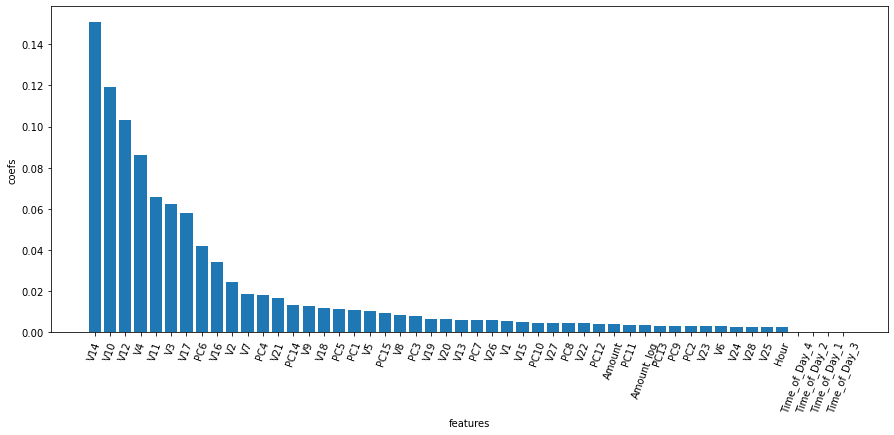

In [179]:
plt.figure(figsize=(15, 6))
plt.bar(np.arange(len(imps)), imps)
plt.xticks(np.arange(len(imps)), imps.index, rotation=70)
plt.xlabel('features')
plt.ylabel('coefs');

#### Эксперименты с порогом

In [135]:
rf_probs = rf_model.predict_proba(X_test)[:, 1] 

In [80]:
df_temp = pd.concat(
    [
        pd.DataFrame(y_test).reset_index(drop=True), 
        pd.DataFrame(rf_preds).reset_index(drop=True),
        pd.DataFrame(rf_probs).reset_index(drop=True)
    ],
    axis=1
)
df_temp.columns = ['y_test', 'rf_preds', 'rf_probs']

In [81]:
df_temp[(df_temp['y_test']==1) & (df_temp['rf_preds']==0)]

,y_test,rf_preds,rf_probs
1784,1,0,0.08
4480,1,0,0.00
5187,1,0,0.00
5505,1,0,0.22
10087,1,0,0.01
12142,1,0,0.04
22495,1,0,0.00
27361,1,0,0.00
29007,1,0,0.00
30416,1,0,0.00


In [82]:
df_temp[(df_temp['y_test']==0) & (df_temp['rf_preds']==0) & (df_temp['rf_probs']>0.2)]

,y_test,rf_preds,rf_probs
9103,0,0,0.40
34990,0,0,0.23
51125,0,0,0.39
53293,0,0,0.27
53773,0,0,0.45


In [136]:
new_threshold = 0.2
rf_preds_custom_threshold = (rf_probs >= new_threshold).astype(int)
print("Random Forest Classification Report with Custom Threshold:")
print(classification_report(y_test, rf_preds_custom_threshold))

Random Forest Classification Report with Custom Threshold:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.92      0.80      0.85        95

    accuracy                           1.00     56746
   macro avg       0.96      0.90      0.93     56746
weighted avg       1.00      1.00      1.00     56746



In [140]:
rf_preds_custom_threshold

array([0, 0, 0, ..., 0, 0, 0])

### XGBoost после применения OverSampler к X_train, y_train

In [99]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)
xgb_preds = xgb_model.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_preds))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.91      0.76      0.83        95

    accuracy                           1.00     56746
   macro avg       0.96      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746



#### Выяснение важности признаков

In [214]:
imps = pd.Series(xgb_model.feature_importances_, index=X.columns)
imps = imps.sort_values(ascending=False)
imps

V14            0.511886
V4             0.063760
V3             0.028308
V12            0.028171
V13            0.019707
V8             0.019565
V20            0.018726
V26            0.018107
V19            0.016572
V21            0.015344
PC2            0.015053
V10            0.013659
V27            0.012747
PC10           0.012058
V15            0.011923
V7             0.011000
PC4            0.010393
V16            0.010312
V6             0.010271
PC6            0.009925
Amount         0.009797
V9             0.009564
PC1            0.009118
V17            0.008777
V23            0.008004
V11            0.007934
PC3            0.007602
PC14           0.006938
V18            0.006832
V28            0.006401
PC7            0.006163
PC5            0.005573
Hour           0.005332
V1             0.004758
PC15           0.004535
PC9            0.004534
V25            0.004114
V24            0.003940
V22            0.003937
PC12           0.003736
V5             0.003723
V2             0

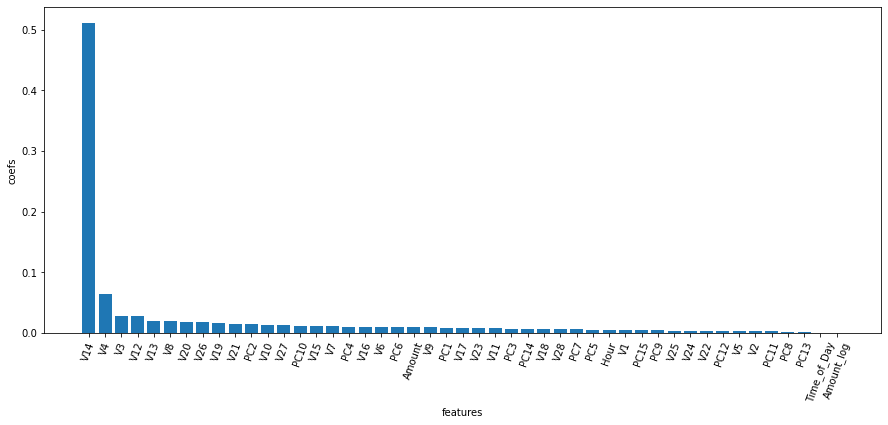

In [215]:
plt.figure(figsize=(15, 6))
plt.bar(np.arange(len(imps)), imps)
plt.xticks(np.arange(len(imps)), imps.index, rotation=70)
plt.xlabel('features')
plt.ylabel('coefs');

#### Эксперименты с порогом

In [102]:
xgb_probs = xgb_model.predict_proba(X_test)[:, 1] 

In [110]:
new_threshold = 0.05
xgb_preds_custom_threshold = (xgb_probs >= new_threshold).astype(int)
print("XGBoost Report with Custom Threshold:")
print(classification_report(y_test, xgb_preds_custom_threshold))

XGBoost Report with Custom Threshold:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.78      0.81      0.79        95

    accuracy                           1.00     56746
   macro avg       0.89      0.91      0.90     56746
weighted avg       1.00      1.00      1.00     56746



## Анализ важности атрибутов

#### RandomForest после применения OverSampler к X_train, y_train

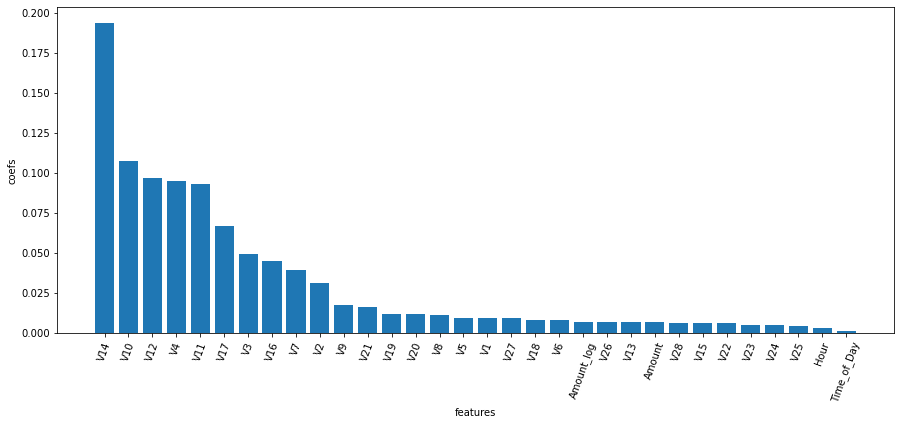

#### XGBoost после применения OverSampler к X_train, y_train

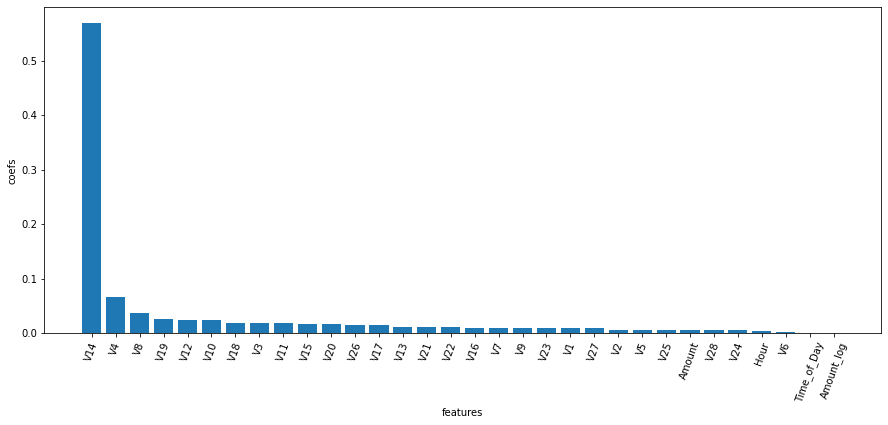

## CatBoost

В других проектах хорошо себя показывала ещё CatBoost. Решил попробовать

### CatBoost после применения OverSampler к X_train, y_train

In [54]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train_resampled, y_train_resampled)
catboost_preds = catboost_model.predict(X_test)

print("CatBoost Classification Report:")
print(classification_report(y_test, catboost_preds))

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.82      0.79      0.80        95

    accuracy                           1.00     56746
   macro avg       0.91      0.89      0.90     56746
weighted avg       1.00      1.00      1.00     56746



### CatBoost с автобалансировкой

In [35]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

catboost_model = CatBoostClassifier(random_state=42, verbose=0, auto_class_weights='SqrtBalanced')
catboost_model.fit(X_train, y_train)
catboost_preds = catboost_model.predict(X_test)

print("CatBoost Classification Report:")
print(classification_report(y_test, catboost_preds))

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.77      0.86        95

    accuracy                           1.00     56746
   macro avg       0.99      0.88      0.93     56746
weighted avg       1.00      1.00      1.00     56746



In [150]:
imps = pd.Series(catboost_model.feature_importances_, index=X.columns)
imps = imps.sort_values(ascending=False)
imps

V14           9.517944
V4            7.475416
V1            6.877573
V12           5.318065
V8            4.686213
V15           4.467919
V17           4.090861
V5            3.833925
V10           3.765101
V11           3.737443
V3            3.424193
V24           3.398046
V26           3.198301
Amount_log    3.000990
V19           2.825958
V2            2.646548
Amount        2.603652
V7            2.472254
V6            2.305114
V13           2.271618
V16           2.231261
V25           2.100751
Hour          1.961357
V9            1.866258
V27           1.849109
V23           1.796874
V22           1.381084
V21           1.380168
V18           1.325357
V20           1.117759
V28           1.072889
dtype: float64

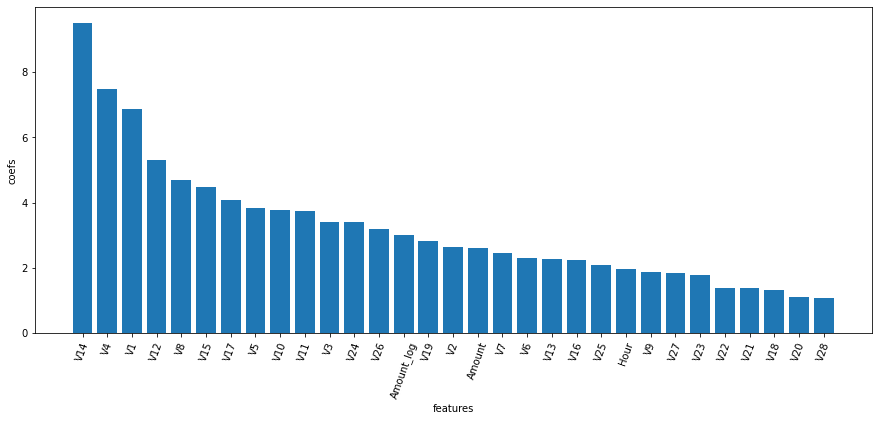

In [151]:
plt.figure(figsize=(15, 6))
plt.bar(np.arange(len(imps)), imps)
plt.xticks(np.arange(len(imps)), imps.index, rotation=70)
plt.xlabel('features')
plt.ylabel('coefs');

Далее метрики при разных комбинациях использования признаков и методов автобалансировки в CatBoost

#### Эксперименты с порогом

In [118]:
catboost_probs = catboost_model.predict_proba(X_test)[:, 1] 
new_threshold = 0.2
catboost_preds_custom_threshold = (catboost_probs >= new_threshold).astype(int)
print("CatBoost Report with Custom Threshold:")
print(classification_report(y_test, catboost_preds_custom_threshold))

CatBoost Report with Custom Threshold:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.91      0.78      0.84        95

    accuracy                           1.00     56746
   macro avg       0.96      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746



## Подбор гиперпараметров

### Random Forest с сэмплированием (ручной подбор)

Не смог придумать, как использовать сэмплирование при GridSearchCV. Поэтому подбирал гиперпараметры вручную.<br>
Дополнительных преимуществ не получил

In [233]:
n_estimators = [100, 200, 300]
for n in n_estimators:
    rf_model = RandomForestClassifier(n_estimators=n,random_state=42)
    rf_model.fit(X_train_resampled, y_train_resampled)
    rf_preds = rf_model.predict(X_test)

    print(f"n_estimators = {n}")
    print(classification_report(y_test, rf_preds))

n_estimators = 100
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.96      0.73      0.83        95

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746

n_estimators = 200
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.74      0.84        95

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746

n_estimators = 300
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.73      0.83        95

    accuracy                           1.00     56746
   macro avg       0.99      0.86      0.92     56746
weighted avg     

In [234]:
list_max_depth = [5, 10]
for max_depth in list_max_depth:
    rf_model = RandomForestClassifier(
        n_estimators=200,
        max_depth=max_depth,
        random_state=42)
    rf_model.fit(X_train_resampled, y_train_resampled)
    rf_preds = rf_model.predict(X_test)

    print(f"max_depth = {max_depth}")
    print(classification_report(y_test, rf_preds))

max_depth = 5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.27      0.81      0.41        95

    accuracy                           1.00     56746
   macro avg       0.64      0.90      0.70     56746
weighted avg       1.00      1.00      1.00     56746

max_depth = 10
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.76      0.75      0.76        95

    accuracy                           1.00     56746
   macro avg       0.88      0.87      0.88     56746
weighted avg       1.00      1.00      1.00     56746



In [236]:
list_min_samples_split = [5, 10]
for min_samples_split in list_min_samples_split:
    rf_model = RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        min_samples_split=min_samples_split,
        random_state=42)
    rf_model.fit(X_train_resampled, y_train_resampled)
    rf_preds = rf_model.predict(X_test)

    print(f"min_samples_split = {min_samples_split}")
    print(classification_report(y_test, rf_preds))

min_samples_split = 5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.74      0.84        95

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746

min_samples_split = 10
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.74      0.84        95

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



In [238]:
list_min_samples_leaf = [2, 3]
for min_samples_leaf in list_min_samples_leaf:
    rf_model = RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        min_samples_leaf=min_samples_leaf,
        random_state=42)
    rf_model.fit(X_train_resampled, y_train_resampled)
    rf_preds = rf_model.predict(X_test)

    print(f"min_samples_leaf = {min_samples_leaf}")
    print(classification_report(y_test, rf_preds))

min_samples_leaf = 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.96      0.74      0.83        95

    accuracy                           1.00     56746
   macro avg       0.98      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746

min_samples_leaf = 3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.96      0.74      0.83        95

    accuracy                           1.00     56746
   macro avg       0.98      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



### Random Forest с взвешиванием классов (GridSearchCV)

>Мой комп не понятнул вычисления. Для работы с GridSearchCV использовал другие более мощные ресурсы. Опять же дополнительных преимушеств от подбора гиперпараметров не получил

## Конечная модель

- Анализ важности атрибутов показал, что среди всех сгенированных признаков хоть каким-то значимыми оказались только **Hour** и **Amount_log**. Метрики моделей, полученных а рамках экспериментов с признаками я отмечал в Excel-таблице Metrics_features.xlsx<br>
- Так как нам желательно выявлять максимальное количество мошеннических тразакций, то я в первую очередь ориентировался на значение recall при выявлении 1. При этом учитывал, чтобы другие метрики не были сильно хуже. <br>
Лучше всего себя показали:
    - CatBoost с параметром автобалансирования auto_class_weights='SqrtBalanced'
    - RandomForest после применения OverSampler к X_train, y_train, а также после снижения порога до 0.2 для выявления 1<br>
Внизу продублированы их метрики

#### Применение анасамбля RandomForest (c меньшим порогом) и CatBoost

In [151]:
new_preds = (rf_preds_custom_threshold | catboost_preds).astype(int)

In [152]:
print(classification_report(y_test, new_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.90      0.80      0.85        95

    accuracy                           1.00     56746
   macro avg       0.95      0.90      0.92     56746
weighted avg       1.00      1.00      1.00     56746



>Применение анасамбля не увеличило recall. Наиболее оптимальным вариантом видится RandomForest со сниженным порогом. Эта модель показала самый высокий recall 0.80, при этом precision после снижения порога тоже не сильно упал и составляет 0.92

## Сохранение модели

In [138]:
from joblib import dump

In [139]:
dump(rf_model, 'random_forest_model.joblib')

['random_forest_model.joblib']